In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic3.csv")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
df["sex"].value_counts()

male      843
female    466
Name: sex, dtype: int64

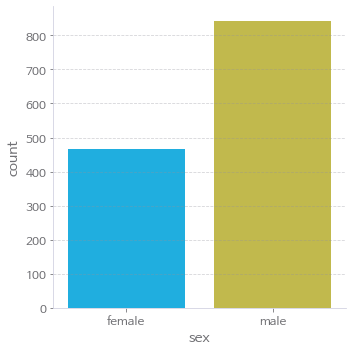

In [6]:
sns.catplot(x="sex", data=df, kind="count")
plt.show()

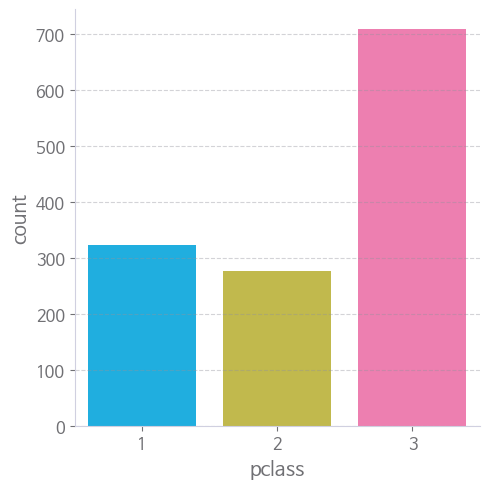

In [7]:
sns.catplot(x="pclass", data=df, kind="count")
plt.show()

In [8]:
df["child"] = df["age"].apply(lambda x: x<=16)

df[ ["age", "child" ] ].head(10)

,age,child
0,29.00,False
1,0.92,True
2,2.00,True
3,30.00,False
4,25.00,False
5,48.00,False
6,63.00,False
7,39.00,False
8,53.00,False
9,71.00,False


In [9]:
df["age_adch"] = df["child"].apply(lambda x: "Child" if x else "Adult")

df[ [ "child", "age_adch" ] ].head(10)

,child,age_adch
0,False,Adult
1,True,Child
2,True,Child
3,False,Adult
4,False,Adult
5,False,Adult
6,False,Adult
7,False,Adult
8,False,Adult
9,False,Adult


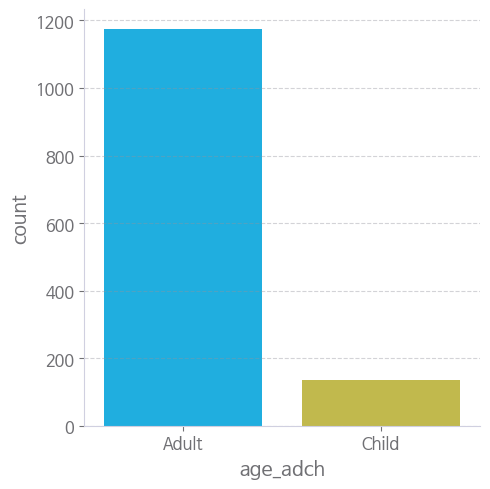

In [10]:
sns.catplot(x="age_adch", data=df, kind="count")
plt.show()

In [11]:
def gender_apply(record):
    if record["child"]:
        return "Children"
    return record["sex"]

In [12]:
df["gender"] = df.apply(gender_apply, axis=1)
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,child,age_adch,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",False,Adult,female
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",True,Child,Children
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",True,Child,Children
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",False,Adult,male
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",False,Adult,female


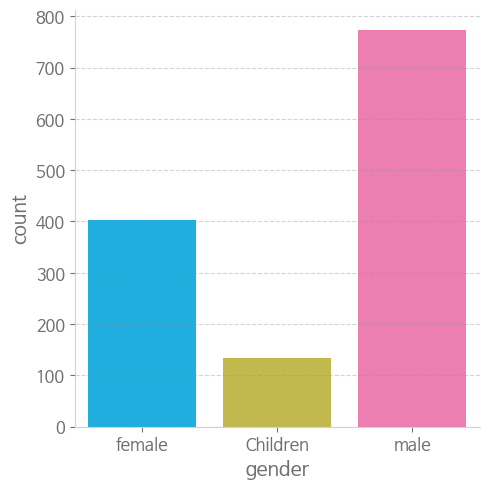

In [13]:
sns.catplot(x="gender", data=df, kind="count")
plt.show()

In [15]:
df["alone"] = df.apply(lambda x: (x["parch"] + x["sibsp"]) == 0, axis=1)

df[ ["sibsp", "parch", "alone"] ].head(10)

,sibsp,parch,alone
0,0,0,True
1,1,2,False
2,1,2,False
3,1,2,False
4,1,2,False
5,0,0,True
6,1,0,False
7,0,0,True
8,2,0,False
9,0,0,True


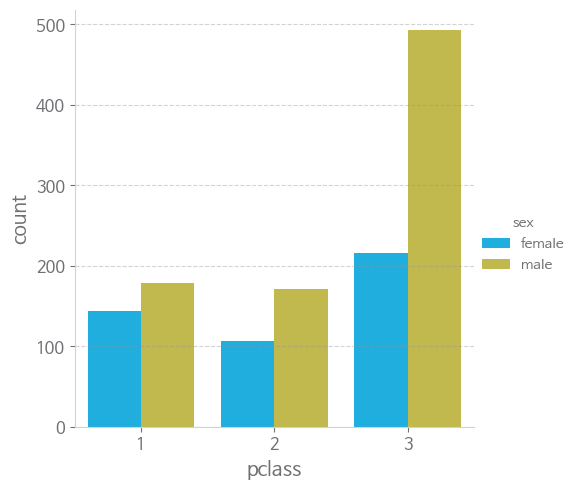

In [16]:
sns.catplot(x="pclass", data=df, kind="count",
           hue="sex")
plt.show()

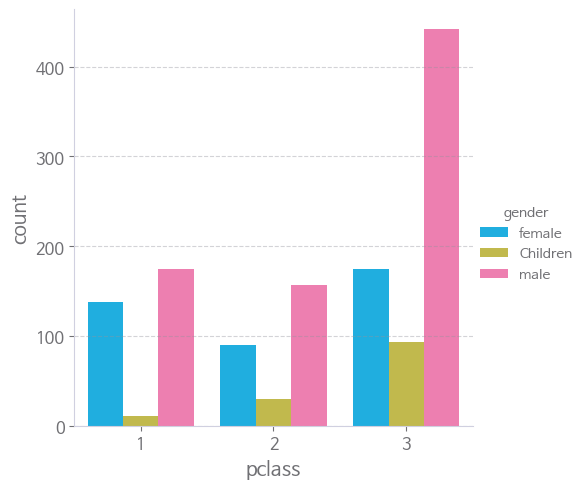

In [18]:
sns.catplot(x="pclass", data=df, kind="count",
           hue="gender")
plt.show()

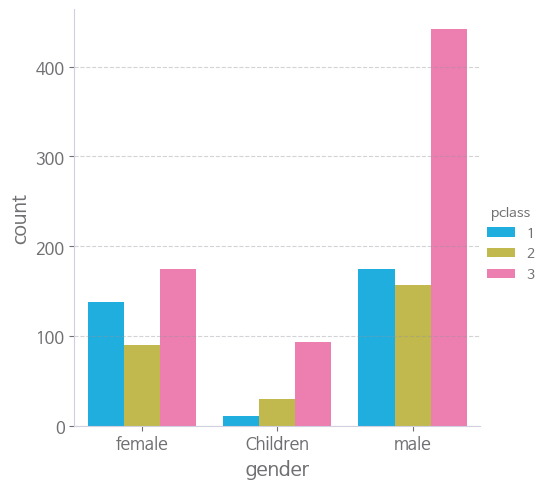

In [19]:
sns.catplot(x="gender", data=df, kind="count",
           hue="pclass")
plt.show()

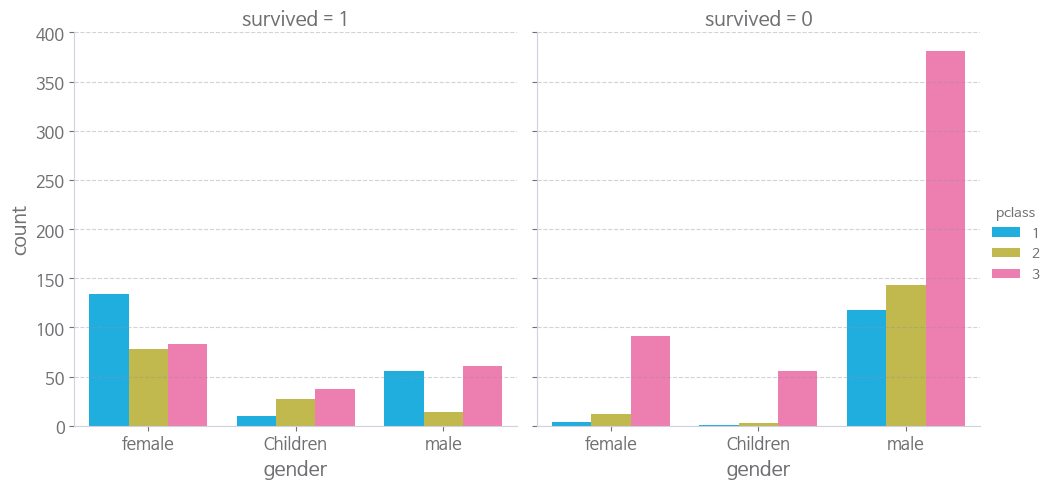

In [20]:
sns.catplot(x="gender", data=df, kind="count",
           hue="pclass",
           col="survived",
           col_order=[1, 0])
plt.show()

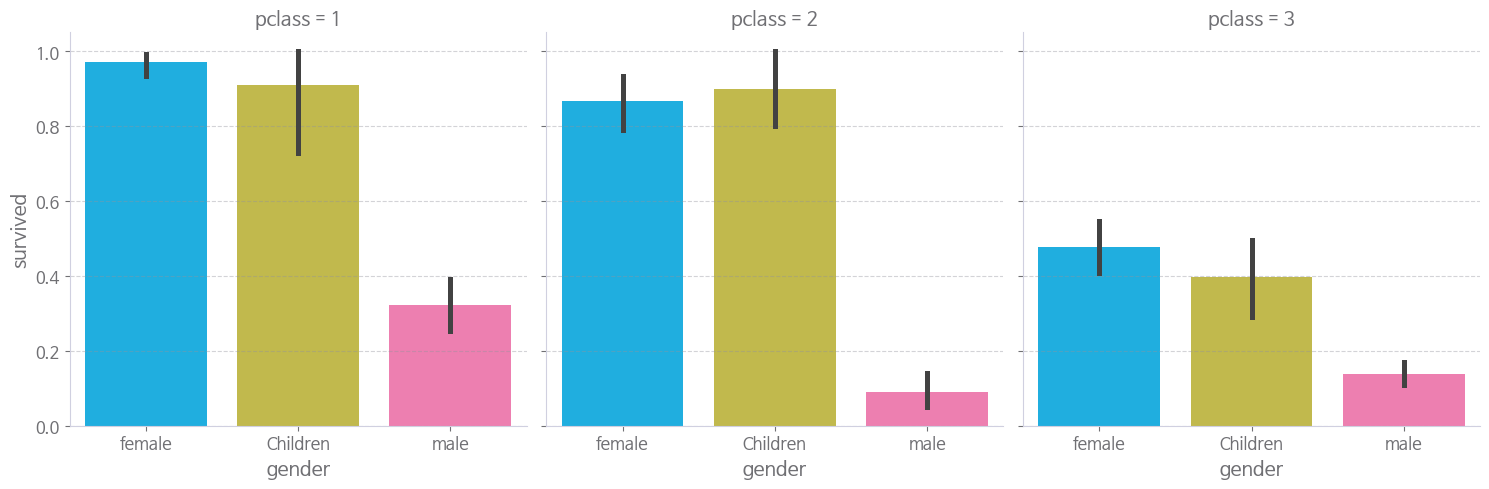

In [21]:
sns.catplot(x="gender", 
            y="survived",
            data=df, 
            kind="bar",
           col="pclass")
plt.show()

<AxesSubplot:xlabel='age'>

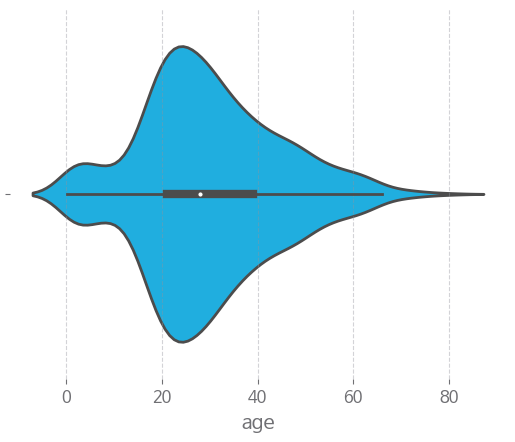

In [22]:
sns.violinplot(x="age",data=df)

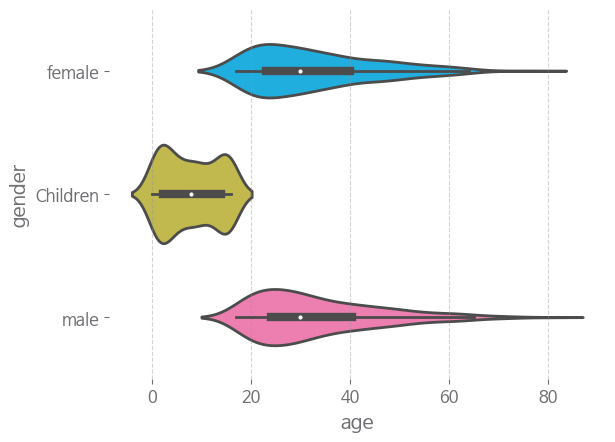

In [23]:
sns.violinplot(x="age",data=df,
              y="gender")
plt.show()


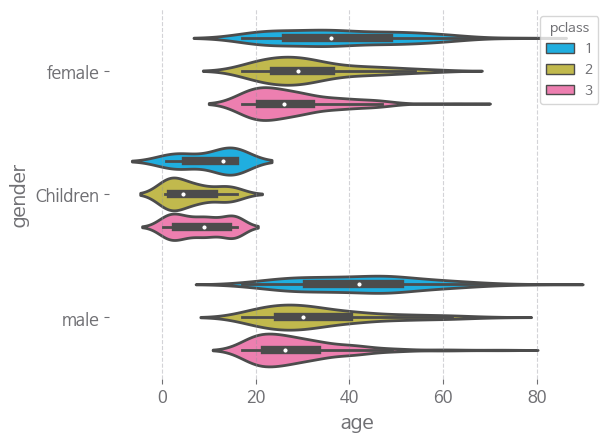

In [24]:
sns.violinplot(x="age",data=df,
              y="gender",
              hue="pclass")
plt.show()


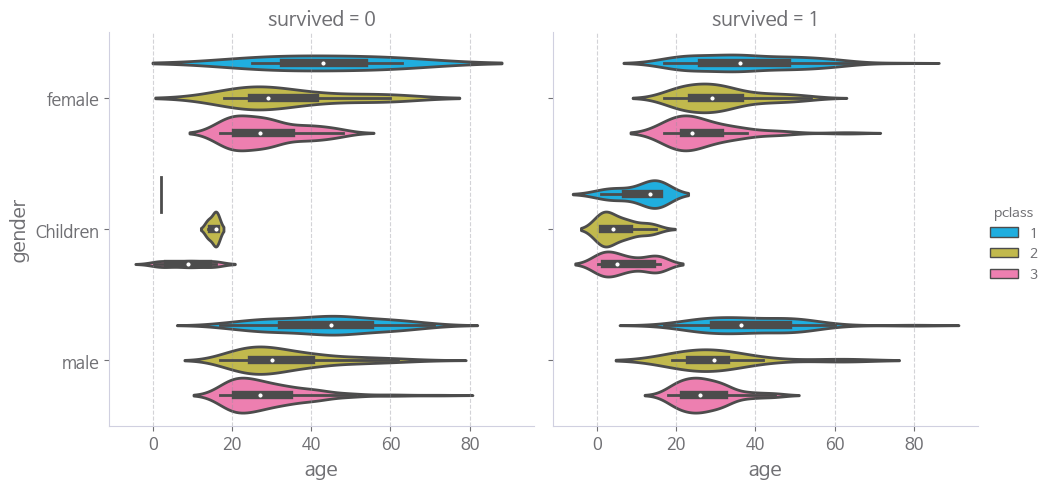

In [26]:
sns.catplot(x="age",data=df,
              y="gender",
              hue="pclass",
              col="survived",
              kind="violin")
plt.show()
